<a href="https://colab.research.google.com/github/luidemendesrios/algoritmos_de_machine_laerning/blob/main/Rede_neural_transfer_laerning_em_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAÇÃO DE DEPENDÊNCIAS DO **PROJETO**

In [1]:
# Permite exibir gráficos diretamente no notebook Jupyter
%matplotlib inline

# Importação de bibliotecas essenciais
import os  # Para operações de sistema e manipulação de arquivos
import random  # Para embaralhamento aleatório
import numpy as np  # Para operações numéricas
import keras  # Para construção de redes neurais
import matplotlib.pyplot as plt  # Para visualização de gráficos
from matplotlib.pyplot import imshow  # Para exibir imagens

# Importações específicas do Keras para manipulação de imagens e construção de modelos
from keras.preprocessing import image  # Para carregar e pré-processar imagens
from keras.applications.imagenet_utils import preprocess_input  # Para normalizar imagens no formato ImageNet
from keras.models import Sequential, Model  # Estruturas de rede neural
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D  # Camadas de redes neurais

# **Importação de Bibliotecas**

In [2]:
import os #Utilizada para manipulação de diretórios e arquivos.
import shutil #Utilizada para operações de cópia e remoção de arquivos e diretórios.
import zipfile #Utilizada para extrair arquivos ZIP.
import requests #Utilizada para fazer requisições HTTP, como baixar o dataset da internet.
from PIL import Image #Utilizada para abrir, manipular e salvar imagens.

# **Funções para Manipulação do Dataset**

In [3]:
# Função para baixar o dataset
def download_dataset(url, output_path):
    response = requests.get(url)
    with open(output_path, 'wb') as f:
        f.write(response.content)

# Função para extrair o arquivo ZIP
def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Função para limpar imagens quebradas e limitar a quantidade de imagens por categoria
def clean_and_limit_images(data_dir, categories, limit):
    for category in categories:
        category_path = os.path.join(data_dir, category)
        images = os.listdir(category_path)
        valid_images = []

        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            try:
                img = Image.open(img_path)
                img.verify()  # Verifica se a imagem está quebrada
                valid_images.append(img_name)
            except (IOError, SyntaxError):
                os.remove(img_path)  # Remove a imagem quebrada

        # Limita a quantidade de imagens por categoria
        for img_name in valid_images[limit:]:
            os.remove(os.path.join(category_path, img_name))

Função do Bloco: Definir funções para baixar, extrair e limpar o dataset.

download_dataset: Faz o download de um arquivo da internet para o caminho especificado.
extract_zip: Extrai o conteúdo de um arquivo ZIP para um diretório.
clean_and_limit_images: Remove imagens que não podem ser abertas (quebradas) e limita o número de imagens em cada categoria para garantir um tamanho de dataset consistente.

# **Configuração dos Parâmetros e Caminhos**

In [4]:
# URL do dataset e caminhos dos arquivos
dataset_url = "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"
zip_path = "kagglecatsanddogs_5340.zip"
data_dir = "/content/cats_and_dogs_data/PetImages"
categories = ["Cat", "Dog"]
limit = 170  # Limitar a 170 imagens por categoria

Função do Bloco: Definir URLs e caminhos necessários para o download e manipulação do dataset, além de definir o limite de imagens por categoria.

# **Baixar, Extrair e Limpar o Dataset**

In [5]:
# Baixar o dataset
print("Baixando o dataset de Cats e Dogs...")
download_dataset(dataset_url, zip_path)

# Extrair os arquivos
print("Extraindo arquivos...")
extract_zip(zip_path, "/content/cats_and_dogs_data")

#  Limpar imagens quebradas e limitar a quantidade de imagens por categoria
print("Limpando imagens quebradas e limitando a quantidade de imagens por categoria...")
clean_and_limit_images(data_dir, categories, limit)

# Verificar o conteúdo extraído
print("Conteúdo extraído:")
for category in categories:
    print(f"{category}: {len(os.listdir(os.path.join(data_dir, category)))} imagens")


Baixando o dataset de Cats e Dogs...
Extraindo arquivos...
Limpando imagens quebradas e limitando a quantidade de imagens por categoria...


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Conteúdo extraído:
Cat: 130 imagens
Dog: 130 imagens


**Função do Bloco:** Executar as funções criadas para baixar, extrair e limpar o dataset, e então verificar o conteúdo final.

**download_dataset**: Faz o download do dataset de imagens de gatos e cachorros.
extract_zip: Extrai o dataset para o diretório especificado.

**clean_and_limit_images**: Remove imagens inválidas e limita o número de imagens por categoria.
Verificação final para confirmar quantas imagens restaram em cada categoria após a limpeza e limitação.

# **Configuração dos Parâmetros e Caminhos**

In [6]:
import os #Utilizada para manipulação de diretórios e arquivos.
# Diretório raiz onde as imagens estão localizadas
root = '/content/cats_and_dogs_data/PetImages'

exclude = []  # Lista de categorias a serem excluídas, atualmente vazia

# Definição das proporções dos conjuntos de treino e validação
train_split, val_split = 0.7, 0.15

# Obtém todas as categorias a partir do diretório raiz, excluindo os diretórios que não interessam
categories = [x[0] for x in os.walk(root) if x[0] != root and os.path.basename(x[0]) not in exclude]

# Refinar a lista de categorias para apenas os nomes dos diretórios
categories = [c for c in categories if os.path.basename(c) in ['Cat', 'Dog']]
#categories = [x[0] for x in os.walk(root) if x[0]][1:]

#categories = [c for c in categories if c not in exclude]

# Mostrar as categorias
print(categories)

['/content/cats_and_dogs_data/PetImages/Dog', '/content/cats_and_dogs_data/PetImages/Cat']


**Função do Bloco:** Configurar parâmetros e caminhos para o diretório onde as imagens estão armazenadas, além de definir categorias a serem incluídas/excluídas.

**root:** Caminho para o diretório raiz que contém as pastas de imagens.

**exclude:** Lista de nomes de diretórios a serem excluídos do processo.
train_split e val_split: Proporções do dataset a serem usadas para treino e validação, respectivamente.

**categories:** Gera uma lista de caminhos de diretórios que representam as categorias, excluindo a raiz e qualquer diretório mencionado em exclude.

# **Função para Carregar e Pré-processar Imagens e carregamento dos dados**

In [7]:
from keras.preprocessing import image #Utilizada para carregar e converter imagens em arrays.
from keras.applications.imagenet_utils import preprocess_input #Utilizada para pré-processar os arrays de imagens de forma compatível com os modelos pré-treinados.
import numpy as np #Utilizada para manipulação de arrays, especialmente para expandir dimensões e converter tipos de dados.


# Função auxiliar para carregar a imagem e retornar a imagem e o vetor de entrada
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))

    x = image.img_to_array(img)

    x = np.expand_dims(x, axis=0)

    x = preprocess_input(x)

    return img, x

**Função do Bloco:** Definir uma função que carrega uma imagem, converte-a em um array e aplica o pré-processamento necessário.

**get_image:** Esta função tenta abrir uma imagem usando o caminho fornecido, redimensioná-la para 224x224 pixels (compatível com VGG16), convertê-la em um array NumPy, expandir as dimensões para se adequar ao formato de entrada do modelo Keras e aplicar o pré-processamento específico do modelo pré-treinado. Se a imagem for inválida, ela imprime um erro e retorna None.

# **Carregamento dos Dados**

In [8]:
import os
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from keras.utils import to_categorical
import random

# Diretório raiz onde as imagens estão localizadas
root = '/content/cats_and_dogs_data/PetImages'

# Lista de categorias - certifique-se de que está correta e corresponde aos diretórios dentro de `root`
categories = ['Cat', 'Dog']  # Supondo que apenas "Cat" e "Dog" são as categorias válidas

# Função para carregar e pré-processar uma imagem
def get_image(path):
    if os.path.isfile(path):  # Verifica se o arquivo existe
        try:
            # Carrega a imagem e redimensiona para o tamanho esperado pelo modelo (224, 224)
            img = image.load_img(path, target_size=(224, 224))
            # Converte a imagem em um array
            x = image.img_to_array(img)
            # Adiciona uma dimensão extra para o batch size (neste caso, size = 1)
            x = np.expand_dims(x, axis=0)
            # Aplica o pré-processamento necessário para compatibilidade com o modelo pré-treinado
            x = preprocess_input(x)
            return img, x
        except UnidentifiedImageError as e:
            print(f"Erro ao carregar a imagem {path}: {e}")
        except Exception as e:
            print(f"Erro desconhecido ao carregar a imagem {path}: {e}")
    else:
        print(f"Caminho da imagem inválido ou não existe: {path}")
    return None, None

# Inicializa a lista de dados
data = []

# Percorre cada categoria definida
for c, category_name in enumerate(categories):
    category_path = os.path.join(root, category_name)
    # Coleta os caminhos de todas as imagens da categoria atual
    category_images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(category_path) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]
    # Carrega e pré-processa cada imagem da categoria atual
    for img_path in category_images:
        img, x = get_image(img_path)
        if img is not None and x is not None:
            # Adiciona a imagem pré-processada e o rótulo à lista de dados
            data.append({'x': np.array(x[0]), 'y': c})

# Conta o número de classes
num_classes = len(categories)


**Função do Bloco:** Carregar as imagens dos diretórios de categoria, aplicar o pré-processamento e armazenar os dados e rótulos em uma lista.

**data:** Lista que armazenará os dados de imagens e seus respectivos rótulos.

**enumerate(categories):** Itera sobre as categorias, incluindo um índice que será usado como rótulo (0 para a primeira categoria, 1 para a segunda, etc.).

**os.walk(category):** Percorre todas as subpastas e arquivos a partir de category, coletando os caminhos de todos os arquivos de imagem.

**get_image:** Chama a função para carregar e pré-processar cada imagem.
Verificação de sucesso: Confirma se a imagem foi carregada e pré-processada com sucesso antes de adicioná-la à lista data.

## **Embaralha os dados para uma divisão aleatória**

In [9]:
random.shuffle(data)

## **Calcula o tamanho dos conjuntos de treino, validação e teste**

In [10]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
## Divide os dados em conjuntos de treino, validação e teste
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

## **Separa as imagens e os rótulos para cada conjunto de dados**

In [11]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]


# **Normalização dos Dados de Imagem**

A normalização é uma etapa crucial no pré-processamento de dados de imagem para machine learning. O objetivo é reduzir a variação dos valores dos pixels, o que pode melhorar a performance e a taxa de convergência do modelo durante o treinamento.

**x_train.astype('float32') / 255.:** Cada elemento do array x_train é convertido para o tipo de dados float32 e então dividido por 255. Isso normaliza os valores dos pixels que originalmente variam de 0 a 255 para o intervalo [0, 1].

**x_val.astype('float32') / 255.:** Mesma operação é aplicada ao conjunto de validação.

**x_test.astype('float32') / 255.:** Mesma operação é aplicada ao conjunto de teste.
Conversão dos Rótulos para Vetores One-hot
A conversão para vetores one-hot é necessária para trabalhar com modelos de classificação que usam a função de perda categorical_crossentropy, comum em tarefas de classificação multi-classe.

**keras.utils.to_categorical(y_train, num_classes):** A função to_categorical transforma os rótulos do conjunto de treino em vetores one-hot. Cada rótulo, que é um inteiro representando a classe, é transformado em um vetor binário de comprimento num_classes, onde apenas a posição correspondente à classe é 1, e todas as outras posições são 0.

**keras.utils.to_categorical(y_val, num_classes):** Aplica a mesma transformação ao conjunto de validação.

**keras.utils.to_categorical(y_test, num_classes):** Aplica a mesma transformação ao conjunto de teste.
Verificação da Forma dos Rótulos
Após a conversão dos rótulos, é útil verificar a forma do array resultante para assegurar que o one-hot encoding foi aplicado corretamente.

**print(y_test.shape):** Imprime a forma do array y_test. Para um conjunto de dados com one-hot encoding aplicado corretamente, você deve esperar uma tupla onde o primeiro elemento é o número de imagens no conjunto de teste e o segundo elemento é o num_classes, indicando que cada rótulo é agora um vetor de tamanho num_classes.

In [12]:
# Normalização dos dados de imagem
x_train = x_train.astype('float32') / 255. #Convertendo os valores dos pixels para o intervalo [0, 1]
x_val = x_val.astype('float32') / 255. #Aplicando a mesma normalização ao conjunto de validação
x_test = x_test.astype('float32') / 255. #Aplicando a mesma normalização ao conjunto de teste

# # Converte os rótulos para vetores one-hot
y_train = keras.utils.to_categorical(y_train, num_classes) #One-hot encoding dos rótulos de treino
y_val = keras.utils.to_categorical(y_val, num_classes) #One-hot encoding dos rótulos de validação
y_test = keras.utils.to_categorical(y_test, num_classes) #One-hot encoding dos rótulos de teste
print(y_test.shape) #Imprime a forma do array de rótulos do conjunto de teste para verificar a dimensão

(39, 2)


Este bloco de código prepara os dados de imagem para o treinamento de um modelo de machine learning ao normalizar os valores dos pixels, e também converte os rótulos numéricos em vetores one-hot para serem usados como saída em um modelo de classificação. A impressão da forma de y_test serve como uma verificação para confirmar que os dados foram transformados corretamente.

# **manipulação de dados para treinamento da rede neural**

`print("finished loading %d images from %d categories"%(len(data), num_classes))`

**Função:** Esta linha imprime um resumo informativo sobre o carregamento dos dados. Informa quantas imagens foram carregadas no total (armazenadas na variável data) e o número de categorias (ou classes) diferentes que essas imagens representam (armazenado em num_classes).

`print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))`

**Função:** Mostra a divisão dos dados entre conjuntos de treino, validação e teste. É essencial para verificar se os dados estão distribuídos de maneira adequada para o treinamento de um modelo de aprendizado de máquina.

`print("training data shape: ", x_train.shape)`

**Função:** Exibe a forma (shape) dos dados de treino, o que inclui o número de amostras e a dimensão de cada imagem (geralmente altura, largura e número de canais). Isso é útil para verificar se os dados foram pré-processados corretamente.

`print("training labels shape: ", y_train.shape)`

**Função:** Imprime a forma das etiquetas (labels) de treino. Isso ajuda a confirmar que o conjunto de labels corresponde ao conjunto de dados de treino, tanto em termos de quantidade quanto de formato.

In [13]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 260 images from 2 categories
train / validation / test split: 182, 39, 39
training data shape:  (182, 224, 224, 3)
training labels shape:  (182, 2)


# **Processamento de imagens**

`images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]`

**Função:** Esta linha percorre todas as subpastas a partir de root (usando os.walk) e cria uma lista de caminhos para arquivos que possuem extensões .jpg, .png ou .jpeg. Isso é útil para carregar todas as imagens de um diretório e seus subdiretórios.

`idx = random.sample(range(len(images)), 8)`

**Função:** Gera uma lista de 8 índices aleatórios para selecionar imagens da lista images. Cada índice é um inteiro entre 0 e o tamanho da lista images.
Para garantir que não haja índices repetidos, você poderia usar a função random.sample para selecionar 8 índices únicos:

`imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]`

**Função:** Carrega 8 imagens selecionadas pelos índices em idx, redimensionando-as para o tamanho de 224x224 pixels. A função image.load_img da biblioteca Keras é utilizada para carregar as imagens.

`concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)`

**Função:** Converte cada imagem em um array NumPy e as concatena horizontalmente (axis=1 indica a concatenação ao longo das colunas). Isso resulta em uma imagem longa composta por 8 imagens dispostas lado a lado.

`plt.figure(figsize=(16,4))`

**Função:** Cria uma figura matplotlib com um tamanho especificado, adequado para exibir uma linha de imagens concatenadas.


`plt.imshow(concat_image)`


**Função:** Exibe a imagem concatenada usando a função imshow do matplotlib.

`plt.show()`

**Função:** Esta linha é essencial para que a imagem seja mostrada em ambientes como Jupyter notebooks ou em scripts que não estão em um contexto gráfico interativo.

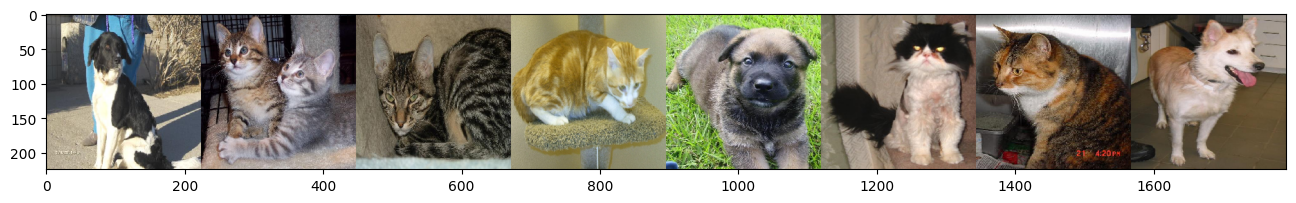

In [14]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = random.sample(range(len(images)), 8)
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

# **Definição de uma rede neural convolucional (CNN) usando o modelo Sequential do Keras**

**Construção do Modelo:** O modelo é construído usando a abordagem Sequential, que é adequada para redes lineares. A impressão das dimensões de entrada é útil para garantir que a forma das imagens está sendo corretamente usada ao definir a rede.

**Camadas Convolutivas:** Todas as camadas convolutivas (Conv2D) são seguidas por funções de ativação ReLU, que são comuns em redes neurais profundas por permitirem aprendizado eficiente. As camadas MaxPooling2D são usadas para reduzir as dimensões espaciais das saídas, o que ajuda a reduzir a quantidade de parâmetros e a possibilidade de overfitting.

**Dropout:** As camadas Dropout são utilizadas após as camadas convolutivas para regularização e prevenção de overfitting. O dropout desabilita aleatoriamente uma fração das unidades durante o treinamento.

**Camada Flatten:** Essencial para transformar a saída 3D das camadas convolutivas em uma forma 1D antes de entrar nas camadas densamente conectadas.

**Camadas Densas (Dense):** A camada densa com 256 unidades é seguida por uma ativação ReLU, e a última camada densa tem o número de unidades igual ao número de classes (num_classes) e usa a ativação softmax para produzir uma distribuição de probabilidade sobre as classes.

**model.summary():** Esta linha é muito útil para verificar a arquitetura do modelo e as dimensões de saída de cada camada. Não requer otimização.

In [15]:

model = Sequential() #Construir a rede
print("Input dimensions: ",x_train.shape[1:]) #Imprima as dimensões de entrada, excluindo a dimensão do tamanho do lote (x_train.shape[1:] captura as dimensões AxLxC)

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:])) #Primeira camada convolucional com 32 filtros, cada um de tamanho 3x3, usando a função de ativação ReLU
model.add(Activation('relu')) #E uma camada MaxPooling com tamanho de pool de 2x2 para reduzir as dimensões espaciais pela metade
model.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda camada convolucional com outros 32 filtros, cada um de tamanho 3x3, seguido pela ativação ReLU
#e outra camada MaxPooling com tamanho de pool de 2x2.
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))#Camada de eliminação para evitar overfitting, definindo aleatoriamente 25% das unidades de entrada como 0 durante o treinamento.

#Terceira camada convolucional com 32 filtros, cada um de tamanho 3x3, seguido pela ativação ReLU
#e outra camada MaxPooling com tamanho de pool de 2x2.
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Quarta camada convolucional com outros 32 filtros, cada um de tamanho 3x3, seguido pela ativação ReLU
#e outra camada MaxPooling com tamanho de pool de 2x2.
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Another Dropout layer with a rate of 25%.
model.add(Dropout(0.25))
#Achate a camada para converter a saída 3D das camadas convolucionais em um vetor 1D antes de alimentá-lo nas camadas totalmente conectadas.
model.add(Flatten())
#Camada totalmente conectada com 256 unidades e função de ativação ReLU.
model.add(Dense(256))
model.add(Activation('relu'))

#Camada de abandono com uma taxa de 50% para evitar overfitting.
model.add(Dropout(0.5))

#Camada final totalmente conectada com unidades num_classes (o número de classes de saída)
#e uma função de ativação softmax para classificação multiclasse.
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#Exiba um resumo da arquitetura do modelo, incluindo tipos de camadas e formas de saída.
model.summary()

Input dimensions:  (224, 224, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,209,058 (4.61 MB)

 Trainable params: 1,209,058 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Compilar e treinar um modelo de rede neural utilizando Keras**

`model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])`

**Função:** Compila o modelo definindo a função de perda e o otimizador que serão utilizados durante o treinamento. A função de perda categorical_crossentropy é apropriada para problemas de classificação multiclasse, onde as saídas são representadas em formato de one-hot encoding. O otimizador adam é um algoritmo de otimização popular que utiliza gradientes adaptativos e é eficiente em termos de computação. A métrica accuracy é usada para monitorar a precisão do modelo durante o treinamento.

`history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))`

**Função:** Treina o modelo usando os dados de treinamento x_train e y_train. O treinamento é realizado em mini-batch gradient descent, com o tamanho do lote (batch size) definido para 128. O modelo será treinado por 10 épocas, ou seja, passará por todos os dados de treinamento 10 vezes. Além disso, uma parte dos dados é reservada para validação (x_val e y_val), permitindo monitorar o desempenho do modelo durante o treinamento.

In [16]:
# Compilar o modelo usando a função de perda categorical_crossentropy e o otimizador adam
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Treinar o modelo com os dados de treinamento (x_train, y_train)
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.5287 - loss: 0.7032 - val_accuracy: 0.5128 - val_loss: 0.6853
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5298 - loss: 0.6934 - val_accuracy: 0.4872 - val_loss: 0.6842
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.5486 - loss: 0.6843 - val_accuracy: 0.7179 - val_loss: 0.6831
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.6478 - loss: 0.6677 - val_accuracy: 0.5385 - val_loss: 0.6749
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5951 - loss: 0.6664 - val_accuracy: 0.5128 - val_loss: 0.6656
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.6719 - loss: 0.6296 - val_accuracy: 0.7436 - val_loss: 0.6606
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.6562 - loss: 0.6068 - val_accuracy: 0.5897 - val_loss: 0.6403
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.6991 - loss: 0.5681 - val_accuracy: 0.7692 - val_loss: 0.6283
Epoch 9/

# **Cria gráficos para visualizar a perda e a acurácia de validação durante o treinamento de um modelo de aprendizado de máquina com o Keras**

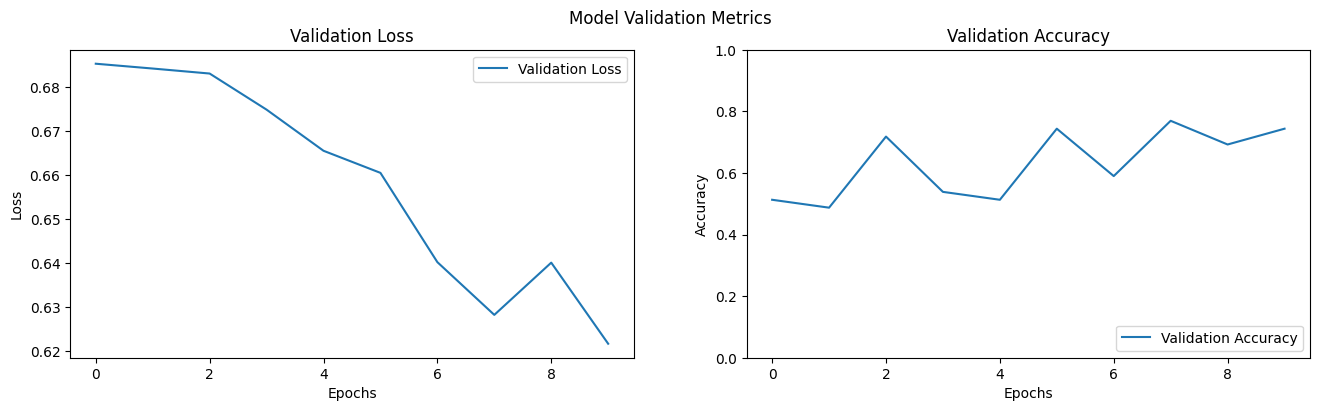

In [17]:
import matplotlib.pyplot as plt

# Criar uma figura com um tamanho específico para o gráfico (16x4) e adicionar subplots
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Gráfico de perda de validação
ax.plot(history.history["val_loss"]) #Plota a perda de validação
ax.set_title("Validation Loss") ##Define o título do subplot
ax.set_xlabel("Epochs") #Rotula o eixo x com "epochs"
ax.set_ylabel("Loss") ##Rotula o eixo y com "Loss"
ax.legend(["Validation Loss"], loc="upper right")

# Gráfico de acurácia de validação
ax2.plot(history.history["val_accuracy"])  #Plota a acurácia de validação
ax2.set_title("Validation Accuracy") #Define o título do subplot
ax2.set_xlabel("Epochs") #Rotula o eixo x com "epochs"
ax2.set_ylabel("Accuracy") #Rotula o eixo y com "Accuracy"
ax2.set_ylim(0, 1) #Define os limites do eixo y para a acurácia, de 0 a 1
ax2.legend(["Validation Accuracy"], loc="lower right")

# Definir um título para a figura inteira
fig.suptitle('Model Validation Metrics')

# Exibir os gráficos
plt.show()

# **Avaliar um modelo treinado em um conjunto de dados de teste e imprimir os resultados dessa avaliação, especificamente a perda (loss) e a acurácia (accuracy).**

In [18]:
# Avaliar o modelo no conjunto de dados de teste com detalhes verbais se necessário
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)

# Imprimir a perda (loss) no conjunto de teste com duas casas decimais
print(f'Test loss: {loss:.2f}')

# Imprimir a acurácia (accuracy) no conjunto de teste com duas casas decimais
print(f'Test accuracy: {accuracy:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.4981 - loss: 0.7458
Test loss: 0.73
Test accuracy: 0.51


# **Carrega o modelo VGG16 com pesos pré-treinados no ImageNet e exibe um resumo da arquitetura do modelo**

`from keras.applications import VGG16`

**Função:** Importa a classe VGG16 da biblioteca Keras Applications, que contém implementações de modelos de redes neurais convolucionais pré-treinados.

`vgg = VGG16(weights='imagenet', include_top=True)`

**Função:** Cria uma instância do modelo VGG16. O argumento weights='imagenet' indica que o modelo deve ser carregado com pesos pré-treinados no dataset ImageNet. O argumento include_top=True mantém as camadas totalmente conectadas finais, adequadas para a classificação com o número de classes do ImageNet.

`vgg.summary()`

**Função:** Exibe um resumo da arquitetura do modelo VGG16, incluindo o nome das camadas, o número de parâmetros e a forma de saída de cada camada.

In [19]:
# Carregando o modelo VGG16 com pesos pré-treinados no ImageNet
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)

# Exibindo um resumo da arquitetura do modelo VGG16
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

# **Modifica o modelo VGG16 ao substituir as camadas finais por uma nova camada de classificação para adaptar o modelo a um novo conjunto de dados e tarefa de classificação**

In [20]:
# Fazendo referência à camada de entrada do modelo VGG
inp = vgg.input

# Criando uma nova camada de classificação com softmax
new_classification_layer = Dense(num_classes, activation='softmax')

# Conectando a nova camada ao penúltimo output da rede VGG (a penúltima camada)
out = new_classification_layer(vgg.layers[-2].output)

# Criando um novo modelo entre a camada de entrada do VGG e a nossa nova camada de saída
model_new = Model(inp, out)

# **Congelar todas as camadas do modelo VGG16 modificados, exceto a última camada, e então compilar e resumir a arquitetura do modelo.**

In [21]:
# Congelando todas as camadas (exceto a última) para que seus pesos não sejam ajustados durante o treinamento
for l, layer in enumerate(model_new.layers[:-1]): ## Percorre todas as camadas até a penúltima
    layer.trainable = False # Define como não treinável, ou seja, seus pesos serão mantidos constantes

# Garantindo que a última camada seja treinável
for l, layer in enumerate(model_new.layers[-1:]): #Percorre a última camada do modelo
    layer.trainable = True #Define como treinável, permitindo que seus pesos sejam ajustados durante o treinamento


# Compilando o modelo com a função de perda 'categorical_crossentropy' e o otimizador 'adam'
model_new.compile(
    loss='categorical_crossentropy', #Função de perda adequada para classificação multiclasse
    optimizer='adam', #Otimizador escolhido para o treinamento
    metrics=['accuracy'] #Métrica para avaliar o desempenho do modelo
)



# Exibindo a arquitetura do modelo com as configurações de camadas treináveis
model_new.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 8,194 (32.01 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [22]:
# Treinando o modelo model_new com os dados de treinamento e validação
history2 = model_new.fit(
    x_train,  # Dados de entrada para o treinamento
    y_train,  # Rótulos das classes para os dados de entrada
    batch_size=128,  # Número de amostras por atualização de gradiente
    epochs=10,  # Número de épocas (iterações sobre o conjunto de dados)
    validation_data=(x_val, y_val)  # Dados de validação para acompanhar a performance durante o treinamento
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 122s 51s/step - accuracy: 0.5711 - loss: 0.8411 - val_accuracy: 0.5128 - val_loss: 0.7535
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 152s 52s/step - accuracy: 0.4937 - loss: 0.8121 - val_accuracy: 0.4872 - val_loss: 1.2325
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 130s 50s/step - accuracy: 0.5063 - loss: 1.0769 - val_accuracy: 0.6410 - val_loss: 0.6451
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 121s 51s/step - accuracy: 0.6457 - loss: 0.6619 - val_accuracy: 0.5128 - val_loss: 0.8938
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 142s 51s/step - accuracy: 0.4833 - loss: 0.8705 - val_accuracy: 0.7436 - val_loss: 0.6077
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 149s 59s/step - accuracy: 0.7178 - loss: 0.5826 - val_accuracy: 0.5128 - val_loss: 0.7533
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 144s 70s/step - accuracy: 0.5575 - loss: 0.6512 - val_accuracy: 0.6410 - val_loss: 0.6118
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 178s 50s/step - accuracy: 0.6965 - loss: 0.5430 - val_accuracy: 0.6410 - val_loss:

**Biblioteca matplotlib para criar uma figura com dois subgráficos, cada um exibindo diferentes métricas de treinamento obtidas de dois históricos de treinamento (history e history2).**

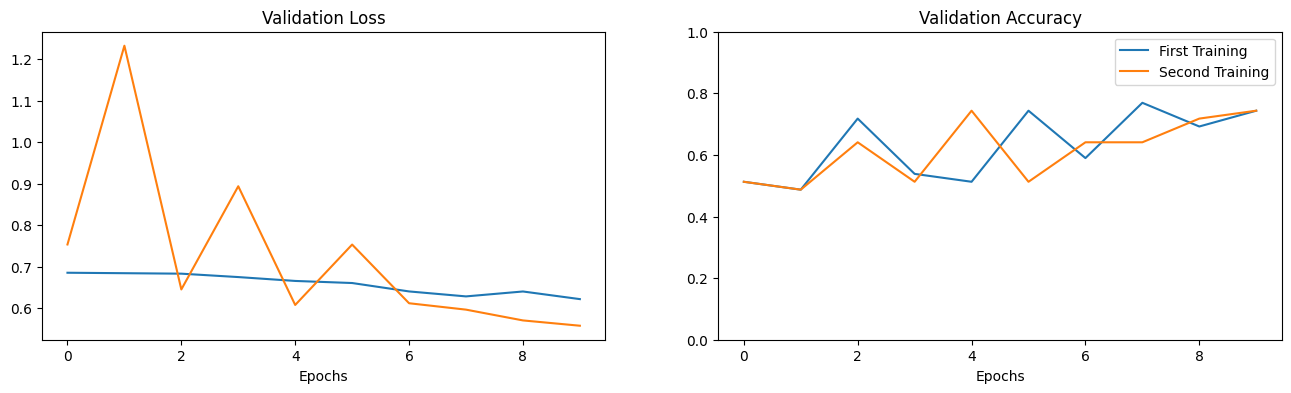

In [23]:
import matplotlib.pyplot as plt
# Criar uma figura com dois subgráficos (1 linha, 2 colunas)
fig = plt.figure(figsize=(16,4)) #'figsize=(16,4)' define o tamanho da figura para 16 unidades de largura e 4 unidades de altura

# Primeiro subgráfico para a perda de validação (val_loss)
# 'add_subplot(121)' cria o primeiro subgráfico na posição (1, 2, 1), ou seja, primeira coluna
ax = fig.add_subplot(121) # Plotar a perda de validação do primeiro histórico de treinamento
ax.plot(history.history["val_loss"]) # Plotar a perda de validação do segundo histórico de treinamento
ax.plot(history2.history["val_loss"]) # Definir o título do primeiro subgráfico como "Validation Loss"
ax.set_title("Validation Loss") #  Definir o rótulo do eixo x como "Epochs"
ax.set_xlabel("Epochs") # Adicionar uma legenda para diferenciar os dois históricos de treinamento

# Segundo subgráfico para a acurácia de validação (val_accuracy)
ax2 = fig.add_subplot(122) # 'add_subplot(122)' cria o segundo subgráfico na posição (1, 2, 2), ou seja, segunda coluna
ax2.plot(history.history["val_accuracy"], label='First Training') # Plotar a acurácia de validação do primeiro histórico de treinamento
ax2.plot(history2.history["val_accuracy"], label='Second Training') # Definir o título do segundo subgráfico como "Validation Accuracy"
ax2.set_title("Validation Accuracy") #
ax2.set_xlabel("Epochs") # Definir o rótulo do eixo x como "Epochs"
ax2.set_ylim(0, 1) #Definir os limites do eixo y para ficar entre 0 e 1, adequado para acurácia
# Adicionar uma legenda para diferenciar os dois históricos de treinamento
ax2.legend()

# Mostrar a figura com os subgráficos
plt.show()

# **Avaliando a performance do modelo nos dados de teste**

Este bloco de código tem como objetivo avaliar o desempenho de um modelo de aprendizado de máquina (provavelmente treinado com Keras, dada a sintaxe) nos dados de teste e exibir os resultados dessa avaliação.

In [24]:
# Avaliando a performance do modelo nos dados de teste
# Aqui, 'model_new' é um modelo previamente treinado, e 'evaluate' é um método que calcula a perda e a métrica de acurácia
# para os dados fornecidos ('x_test' e 'y_test'). O parâmetro 'verbose=0' indica que não queremos
# nenhuma saída detalhada durante a avaliação, ou seja, o processo será silencioso.
loss, accuracy = model_new.evaluate(
    x_test,
    y_test,
    verbose=0
)


# Exibindo a perda (loss) e a acurácia (accuracy) no conjunto de testes
# Após a avaliação, o resultado é armazenado nas variáveis 'loss' e 'accuracy'. O comando 'print'
# é usado para exibir esses valores na saída padrão (geralmente o console).
print('Test loss:', loss) # Imprime a perda calculada para os dados de teste
print('Test accuracy:', accuracy) # Imprime a acurácia calculada para os dados de teste


Test loss: 0.4384602904319763
Test accuracy: 0.7692307829856873


Este bloco de código realiza a tarefa de baixar uma imagem da internet, pré-processá-la e usar um modelo de aprendizado de máquina para classificá-la. Em seguida, exibe a classe prevista e a confiança dessa previsão.

In [27]:
import requests # Importa a biblioteca requests para fazer solicitações HTTP
from PIL import Image # Importa a biblioteca Pillow para manipulação de imagens
from io import BytesIO # Importa BytesIO para ler o conteúdo da imagem da resposta HTTP

# URL da imagem - Using a different URL that allows access
#image_url = 'https://www.doglife.com.br/blog/assets/post/gato-preto-6282cd16a037b01682f42c5d/gato-preto-capa.webp?w=1200'
image_url = 'https://midias.correiobraziliense.com.br/_midias/jpg/2024/03/29/675x450/1_golden_retriever-35867546.jpg?20240329205330?20240329205330'

# Baixar a imagem da web
response = requests.get(image_url, stream=True)
response.raise_for_status() # Levanta uma exceção HTTPError se a resposta HTTP não for 2xx (sucesso)
img = Image.open(BytesIO(response.content)) # Abre a imagem usando o conteúdo da resposta HTTP


# Salvar temporariamente a imagem localmente (opcional, para facilitar o debug)
img.save('temp_image.jpg')

# Pré-processar a imagem para fazer a previsão
# Redimensiona a imagem para o tamanho esperado pelo modelo, neste caso, 224x224 pixels
# Convertendo a imagem para um array NumPy usando img_to_array
x = image.img_to_array(img.resize((224, 224)))  # Redimensionar para o tamanho do modelo

# Adiciona uma dimensão extra ao array para representar uma 'batch' de imagens, mesmo que seja apenas uma imagem
x = np.expand_dims(x, axis=0)

# Aplica a função de pré-processamento adequada ao modelo (preprocess_input) para normalizar a entrada
x = preprocess_input(x)

#  Fazer a previsão utilizando o modelo previamente treinado (model_new)
probabilities = model_new.predict(x)

# Obter a classe com maior probabilidade entre as predições
# np.argmax retorna o índice do valor máximo na lista de probabilidades
class_index = np.argmax(probabilities)

# Calcular a confiança da classificação em percentual
confidence = probabilities[0][class_index] * 100

# Lista de classes que o modelo pode prever (neste exemplo, apenas 'Cachorro' e 'Gato')
classes = ['Gato','Cachorro']

# Exibir o resultado da classificação com a classe e a confiança
print(f"A imagem foi classificada como '{classes[class_index]}' "
      f"com {confidence:.2f}% de confiança.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
A imagem foi classificada como 'Cachorro' com 100.00% de confiança.
